## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet

In [2]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 0.24.0
Usando seaborn 0.9.0
Usando scipy 1.2.0


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [3]:
# solução
filmes = pd.read_csv('movies.csv',sep=',')
filmes.columns=['filmeId','titulo','generos']
filmes = filmes.set_index('filmeId')

In [4]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [5]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [6]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [7]:
# solução
notas = pd.read_csv('ratings.csv',sep=',')
notas.columns=['usuarioId','filmeId','nota','momento']


In [8]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [9]:
# solução
grupos_filmes = notas.groupby(by='filmeId')
medias_por_filme = grupos_filmes.mean()
filmes['nota_media'] = medias_por_filme.nota

## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [10]:
# solução para calcular o total de votos por filme
total_votos_por_filme = grupos_filmes.count().nota


In [11]:
# solução para criar a nova coluna e filtrar os filmes
filmes['total_de_votos'] = total_votos_por_filme
filmes = filmes[filmes.total_de_votos> 49]

In [12]:
filmes.head(5)

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

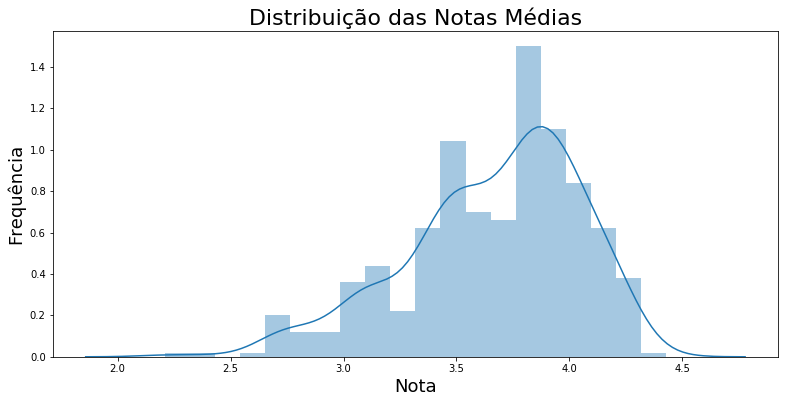

In [13]:
# solução histograma
ax = sns.distplot(filmes.nota_media, bins = 20)
ax.figure.set_size_inches(13,6)
ax.set_title('Distribuição das Notas Médias', fontsize = 22)
ax.set_ylabel('Frequência', fontsize = 18)
ax.set_xlabel('Nota', fontsize = 18)
ax

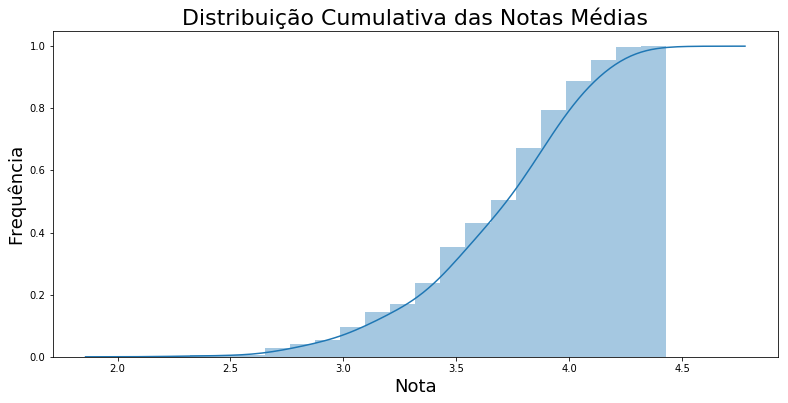

In [14]:
# solução cumulativa
ax = sns.distplot(filmes.nota_media, bins = 20, hist_kws={'cumulative':True},
    kde_kws={'cumulative':True})
ax.figure.set_size_inches(13,6)
ax.set_title('Distribuição Cumulativa das Notas Médias', fontsize = 22)
ax.set_ylabel('Frequência', fontsize = 18)
ax.set_xlabel('Nota', fontsize = 18)
ax

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

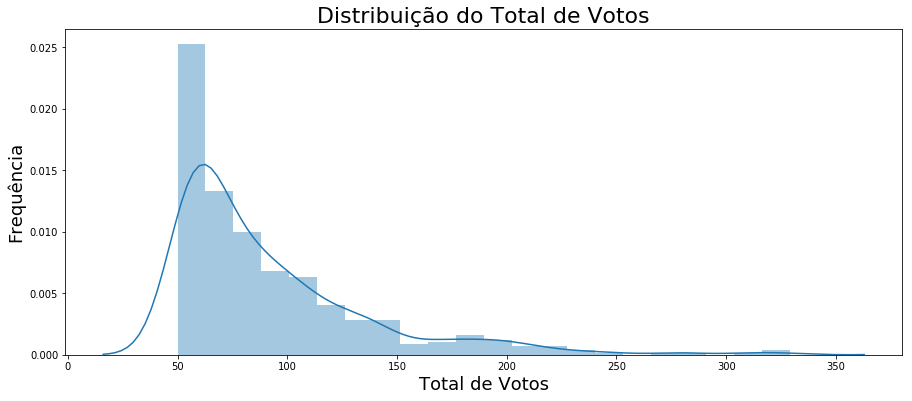

In [15]:
# solução histograma
ax = sns.distplot(filmes.total_de_votos)
ax.figure.set_size_inches(15,6)
ax.set_title('Distribuição do Total de Votos', fontsize = 22)
ax.set_ylabel('Frequência', fontsize = 18)
ax.set_xlabel('Total de Votos', fontsize = 18)
ax

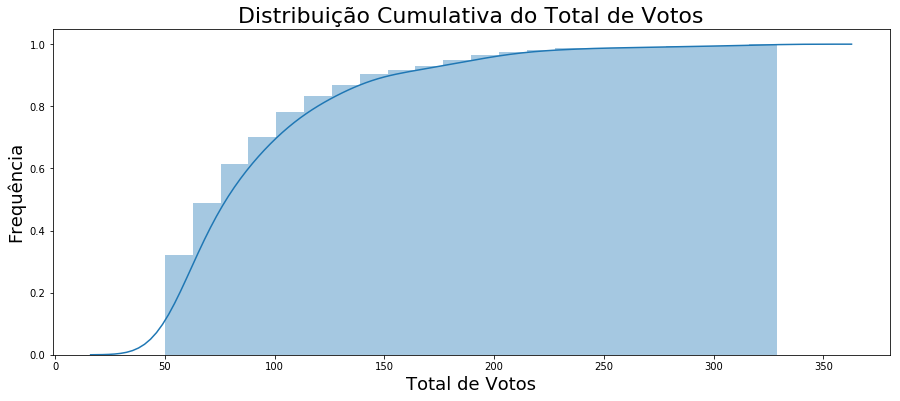

In [16]:
# solução cumulativa
ax = sns.distplot(filmes.total_de_votos, hist_kws={'cumulative':True},
    kde_kws={'cumulative':True})
ax.figure.set_size_inches(15,6)
ax.set_title('Distribuição Cumulativa do Total de Votos', fontsize = 22)
ax.set_ylabel('Frequência', fontsize = 18)
ax.set_xlabel('Total de Votos', fontsize = 18)
ax

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [17]:
filmes['generos'].str.replace('-', '')

filmeId
1              Adventure|Animation|Children|Comedy|Fantasy
2                               Adventure|Children|Fantasy
3                                           Comedy|Romance
6                                    Action|Crime|Thriller
7                                           Comedy|Romance
10                               Action|Adventure|Thriller
11                                    Comedy|Drama|Romance
16                                             Crime|Drama
17                                           Drama|Romance
19                                                  Comedy
21                                   Comedy|Crime|Thriller
25                                           Drama|Romance
32                                  Mystery|SciFi|Thriller
34                                          Children|Drama
36                                             Crime|Drama
39                                          Comedy|Romance
47                                        Myster

In [18]:
# solução
nota_limite_dos_20_porcento = filmes.nota_media.quantile(0.8)

In [19]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.99


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [20]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [21]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

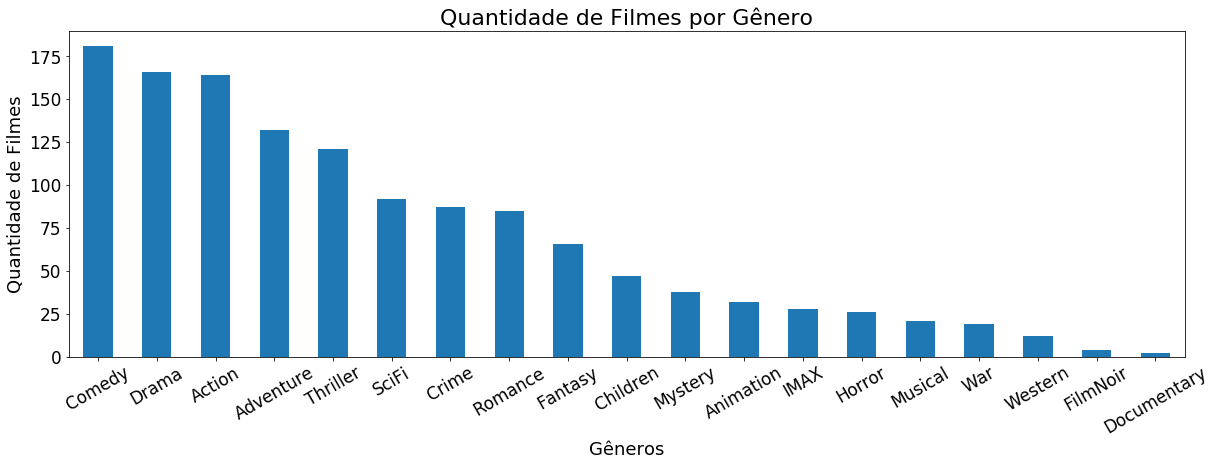

In [22]:
# solução
ax = generos.sum().sort_values(ascending=False).plot(kind='bar')
ax.figure.set_size_inches(20,6)
ax.set_title('Quantidade de Filmes por Gênero', fontsize = 22)
ax.set_ylabel('Quantidade de Filmes', fontsize = 18)
ax.set_xlabel('Gêneros', fontsize = 18)
ax.tick_params(axis='x', labelsize=17, rotation=30)
ax.tick_params(axis='y', labelsize=17)
ax

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [23]:
# solução
top5_generos_em_quantidade_de_filmes = generos.sum().sort_values(ascending=False).head(5)

In [24]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [25]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [26]:
# solucão
votos_por_genero_por_filme.sum().sort_values(ascending=False)

Action         15734.0
Drama          15445.0
Comedy         15330.0
Adventure      13117.0
Thriller       11907.0
SciFi           8989.0
Crime           8649.0
Romance         7444.0
Fantasy         5993.0
Children        4331.0
Mystery         3452.0
Animation       3066.0
IMAX            2492.0
Horror          2215.0
War             2113.0
Musical         1822.0
Western          900.0
FilmNoir         291.0
Documentary      108.0
dtype: float64

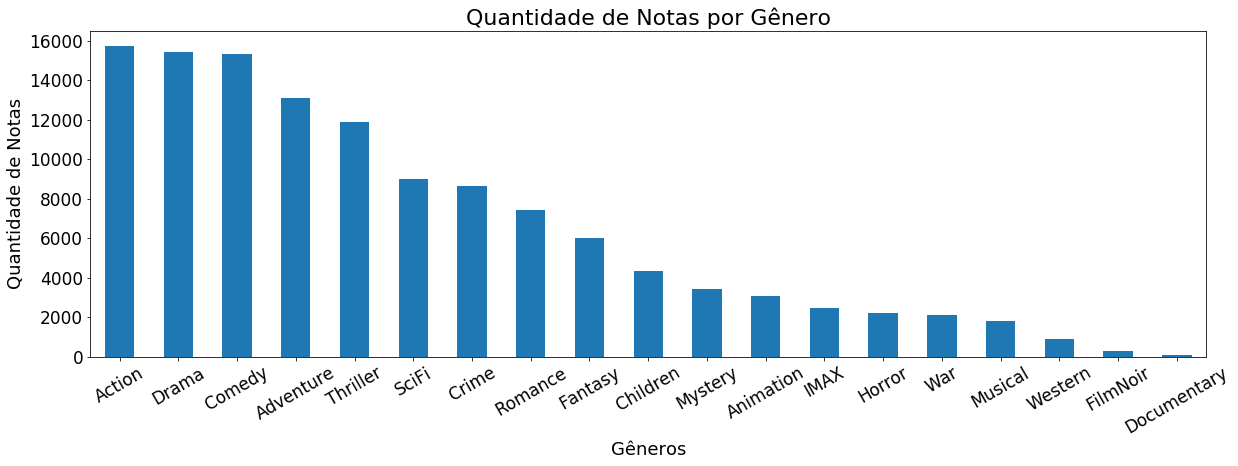

In [27]:
# solução
ax = votos_por_genero_por_filme.sum().sort_values(ascending=False).plot(kind='bar')
ax.figure.set_size_inches(20,6)
ax.set_title('Quantidade de Notas por Gênero', fontsize = 22)
ax.set_ylabel('Quantidade de Notas', fontsize = 18)
ax.set_xlabel('Gêneros', fontsize = 18)
ax.tick_params(axis='x', labelsize=17, rotation=30)
ax.tick_params(axis='y', labelsize=17)
ax


## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [28]:
# solucao código
popularidade_media = votos_por_genero_por_filme.sum() / generos.sum()
popularidade_media.sort_values(ascending=False)

War            111.210526
Crime           99.413793
Adventure       99.371212
Thriller        98.404959
SciFi           97.706522
Action          95.939024
Animation       95.812500
Drama           93.042169
Children        92.148936
Mystery         90.842105
Fantasy         90.803030
IMAX            89.000000
Romance         87.576471
Musical         86.761905
Horror          85.192308
Comedy          84.696133
Western         75.000000
FilmNoir        72.750000
Documentary     54.000000
dtype: float64

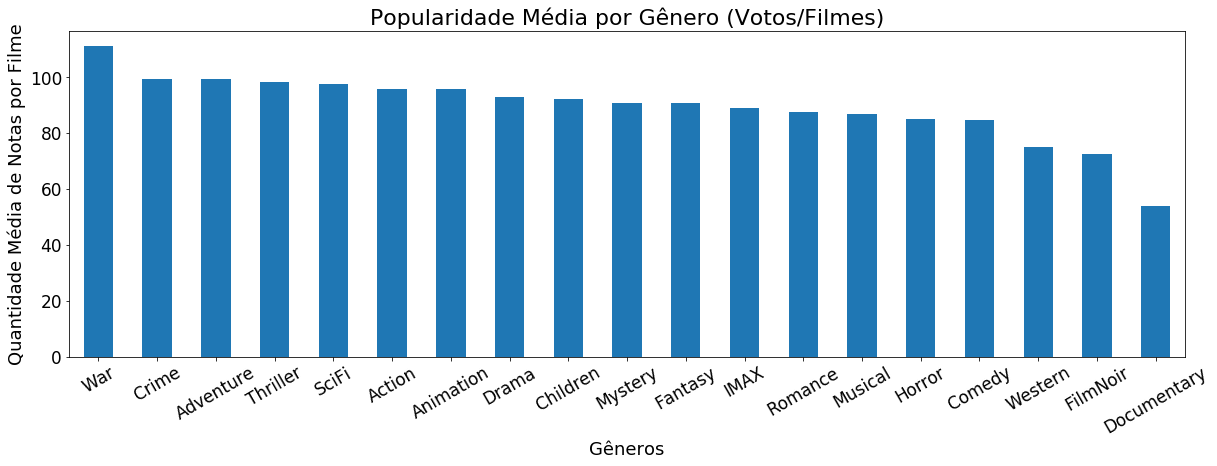

In [29]:
# solução com visualização 
ax = popularidade_media.sort_values(ascending=False).plot(kind='bar')
ax.figure.set_size_inches(20,6)
ax.set_title('Popularidade Média por Gênero (Votos/Filmes)', fontsize = 22)
ax.set_ylabel('Quantidade Média de Notas por Filme', fontsize = 18)
ax.set_xlabel('Gêneros', fontsize = 18)
ax.tick_params(axis='x', labelsize=17, rotation=30)
ax.tick_params(axis='y', labelsize=17)
ax


## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
    
    o genero Action possui a maior quantidade de notas (15734 votos), porém o genero War possui o maior índice Qtd.Votos / Qtd.Filmes (111.21)

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

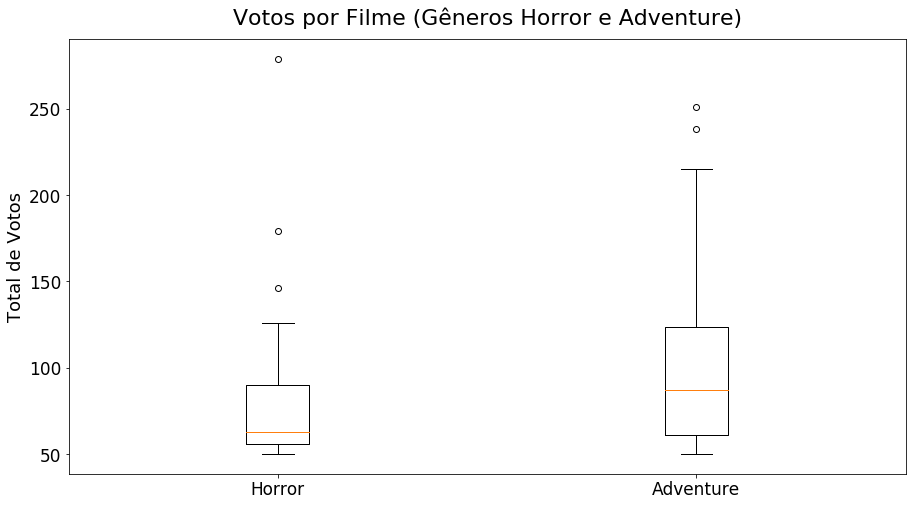

In [30]:
# solução:
import matplotlib.pyplot as plt
fig1, ax = plt.subplots()
ax.boxplot([filmes.total_de_votos[filmes['Horror'] == 1], filmes.total_de_votos[filmes['Adventure'] == 1]], labels=['Horror','Adventure'])
ax.figure.set_size_inches(15,8)
ax.set_title('Votos por Filme (Gêneros Horror e Adventure)', fontsize = 22, y=1.02)
ax.set_ylabel('Total de Votos', fontsize = 18)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax


## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

In [31]:
filmes.head()
generos.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,
1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

In [32]:
# 

### Solução: 
Não tenho nenhuma informação referente a faturamento. Vou tomar a liberdade de partir da premissa que a quantidade de votos é proporcional a quantas pessoas assistiram ao filme, e portanto, proporcional também ao faturamento. Sendo assim, através dos boxplots apresentados acima, podemos perceber que os filmes de Aventura possuem possuem tendência a receber mais votos do que os filmes de Horror. portanto, a sugestão é o gênero Aventura.


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

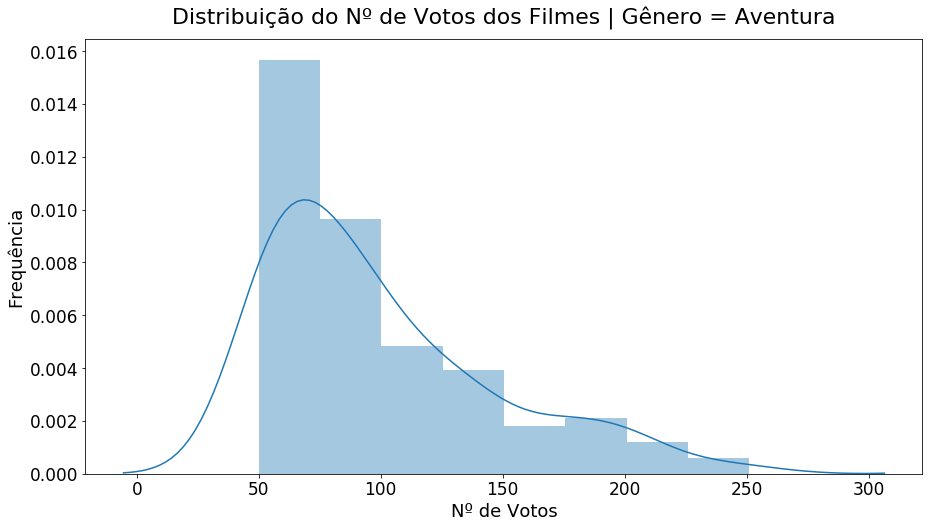

In [33]:
# solucao histograma de aventura
serie_aventura = filmes.total_de_votos[filmes['Adventure'] == 1]
ax = sns.distplot(serie_aventura, bins=8)
ax.figure.set_size_inches(15,8)
ax.set_title('Distribuição do Nº de Votos dos Filmes | Gênero = Aventura', fontsize = 22, y=1.02)
ax.set_ylabel('Frequência', fontsize = 18)
ax.set_xlabel('Nº de Votos', fontsize = 18)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax

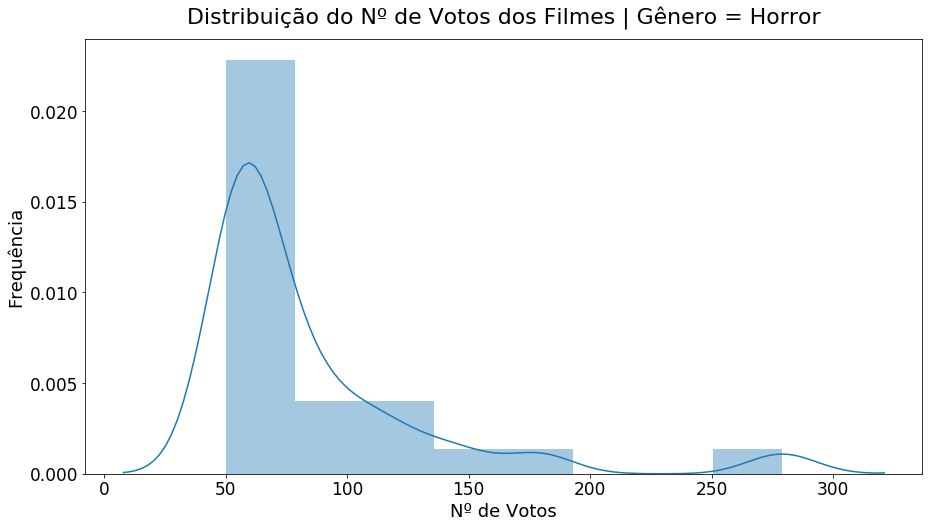

In [34]:
# solucao histograma de horror
serie_horror = filmes.total_de_votos[filmes['Horror'] == 1]
ax = sns.distplot(serie_horror, bins=8)
ax.figure.set_size_inches(15,8)
ax.set_title('Distribuição do Nº de Votos dos Filmes | Gênero = Horror', fontsize = 22, y=1.02)
ax.set_ylabel('Frequência', fontsize = 18)
ax.set_xlabel('Nº de Votos', fontsize = 18)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax

In [35]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

# Resposta Textual prévia: visualmente já podemos perceber que as distribuições não são normais, devido a grande
# assimetria à direita de ambos os gráficos. mas testaremos mesmo assim:

print(scipy.stats.normaltest(serie_horror)) # pvalue = 1.2786148884334685e-07, portanto não-normal
print(scipy.stats.normaltest(serie_aventura)) # pvalue = 5.987863006199139e-06, portanto não-normal

NormaltestResult(statistic=31.744636554701994, pvalue=1.2786148884334685e-07)
NormaltestResult(statistic=24.05155193944971, pvalue=5.987863006199139e-06)


In [36]:
# solução com o teste desejado

# como estamos tratando de distribuições não-normais, realizaremos o teste não-paramétrico de Wilcoxon ()
from scipy.stats import ranksums
q , p = ranksums(serie_aventura, serie_horror)
p

# p = 0.04782366231999856. muito próximo de 5%, mas abaixo. portanto os valores de uma amostra têm uma tendência
# a serem maiores que os da outra. portanto, mesma conclusão da análise gráfica: Aventura


0.04782366231999856

### Solução (explique sua conclusão):
p = 0.04782366231999856. muito próximo de 5%, mas abaixo. portanto os valores de uma amostra têm uma tendência a serem maiores que os da outra. portanto, mesma conclusão da análise gráfica: Aventura


## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

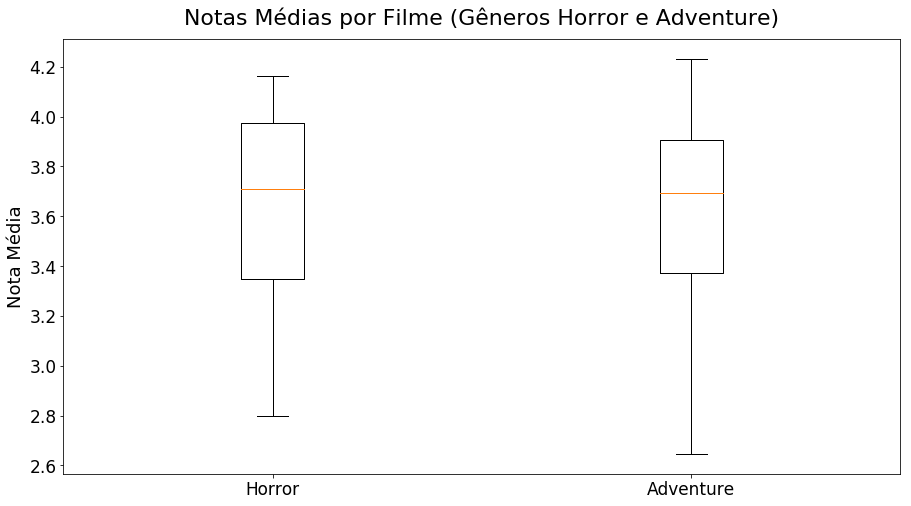

In [37]:
# solução:
fig1, ax = plt.subplots()
ax.boxplot([filmes.nota_media[filmes['Horror'] == 1], filmes.nota_media[filmes['Adventure'] == 1]], labels=['Horror','Adventure'])
ax.figure.set_size_inches(15,8)
ax.set_title('Notas Médias por Filme (Gêneros Horror e Adventure)', fontsize = 22, y=1.02)
ax.set_ylabel('Nota Média', fontsize = 18)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax

In [38]:
print(filmes.nota_media[filmes['Horror'] == 1].describe())
print('\n')
print(filmes.nota_media[filmes['Adventure'] == 1].describe())

count    26.000000
mean      3.610527
std       0.419267
min       2.796875
25%       3.346470
50%       3.707704
75%       3.972898
max       4.161290
Name: nota_media, dtype: float64


count    132.000000
mean       3.615373
std        0.392217
min        2.645455
25%        3.373580
50%        3.693742
75%        3.904919
max        4.232394
Name: nota_media, dtype: float64


## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:
As análises descritivas e gráficas nos indicam que as duas distribuições são muito similares, e possuem média e mediana praticamente iguais. Portanto, não há como recomendar um gênero em comparação ao outro.


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

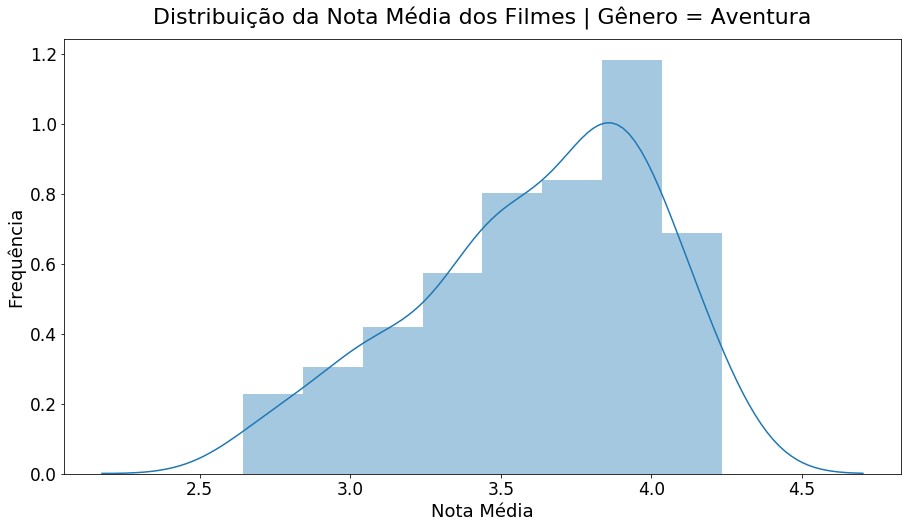

In [39]:
# solucao histograma de aventura
serie_aventura = filmes.nota_media[filmes['Adventure'] == 1]
ax = sns.distplot(serie_aventura, bins=8)
ax.figure.set_size_inches(15,8)
ax.set_title('Distribuição da Nota Média dos Filmes | Gênero = Aventura', fontsize = 22, y=1.02)
ax.set_ylabel('Frequência', fontsize = 18)
ax.set_xlabel('Nota Média', fontsize = 18)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax

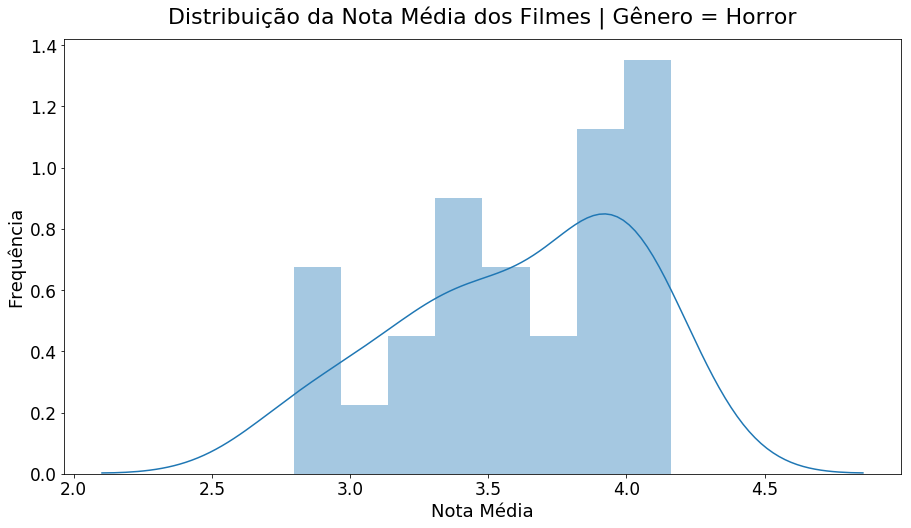

In [40]:
# solucao histograma de horror
serie_horror = filmes.nota_media[filmes['Horror'] == 1]
ax = sns.distplot(serie_horror, bins=8)
ax.figure.set_size_inches(15,8)
ax.set_title('Distribuição da Nota Média dos Filmes | Gênero = Horror', fontsize = 22, y=1.02)
ax.set_ylabel('Frequência', fontsize = 18)
ax.set_xlabel('Nota Média', fontsize = 18)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax

In [41]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

# Resposta Textual prévia: visualmente já podemos perceber que as distribuições não são normais, devido a grande
# assimetria à esquerda de ambos os gráficos. mas testaremos mesmo assim:
serie_horror = filmes.nota_media[filmes['Horror'] == 1]
serie_aventura = filmes.nota_media[filmes['Adventure'] == 1]
scipy.stats.normaltest(serie_horror) # pvalue = 0.21186284682483916, portanto normal (estranho)
scipy.stats.normaltest(serie_aventura) # pvalue = 0.012835697582553224, portanto não-normal

NormaltestResult(statistic=8.711050232224634, pvalue=0.012835697582553224)

In [42]:
# solução com o teste desejado (Teste considerando normalidade))
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import zconfint
print(zconfint(serie_horror, serie_aventura))
print(ttest_ind(serie_horror, serie_aventura))

# p value 95% e intervalo de confiança simétrico ao 0. não conseguimos diferenciar a tendência de valores 

(-0.17166316262580447, 0.16196987742954458)
Ttest_indResult(statistic=-0.05694426988823663, pvalue=0.9546624603927559)


In [43]:
# Solução com teste não paramétrico
serie_horror = filmes.nota_media[filmes['Horror'] == 1]
serie_aventura = filmes.nota_media[filmes['Adventure'] == 1]
from scipy.stats import ranksums
q , p = ranksums(serie_aventura, serie_horror)
p # p = 0.8310397344212459 portanto nenhuma amostra possui tendência a ser maior que a outra.

0.8310397344212459

## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:
Os gêneros Horror e Adventure possuem notas com distribuições muito semelhantes, em torno do mesmo valor central. não fomos capazes de apontar uma tendência de maiores valores nem através da análise gráfica, e nem da análise estatística. dessa forma não somos capazes de apontar uma sugestão de gênero.

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:
Adventure. pois dos dois critérios de escolha, em um houve empate, e no outro Adventure mostrou tendência a valores maiores.



## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [47]:
# solução: calculando os 2 generos mais votados
votos_por_genero = votos_por_genero_por_filme.sum().sort_values(ascending=False)[0:2]
votos_por_genero.head()

Action    15734.0
Drama     15445.0
dtype: float64

In [48]:
# solução: encontrando os top 5 filmes desses generos
filmes_dois_generos = filmes.query('{} == 1 or {} == 1'.format(votos_por_genero.index[0], votos_por_genero.index[1]))
filmes_dois_generos.sort_values('nota_media', ascending=False)[0:5].iloc[:,0:3]


,titulo,ano_de_lancamento,nota_media
filmeId,,,
318,"Shawshank Redemption, The (1994)",1994.0,4.429022
858,"Godfather, The (1972)",1972.0,4.289062
2959,Fight Club (1999),1999.0,4.272936
1276,Cool Hand Luke (1967),1967.0,4.271930
1221,"Godfather: Part II, The (1974)",1974.0,4.259690


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [49]:
# solucao
print(filmes.iloc[:,2:999].corr().nota_media.sort_values(ascending=False))

print("Os dois gêneros com maior correlação com a Nota Média são Drama e Crime")
print("Os dois gêneros com menor correlação com a Nota Média são Comédia e Ação")

nota_media        1.000000
total_de_votos    0.342584
Drama             0.277662
Crime             0.190220
Mystery           0.129914
War               0.125615
FilmNoir          0.081766
IMAX              0.064931
Animation         0.043071
Documentary      -0.003486
Musical          -0.008529
Thriller         -0.016782
Fantasy          -0.020986
Children         -0.030360
Horror           -0.033877
Western          -0.059642
Romance          -0.072002
Adventure        -0.079985
SciFi            -0.136717
Action           -0.154089
Comedy           -0.256005
Name: nota_media, dtype: float64
Os dois gêneros com maior correlação com a Nota Média são Drama e Crime
Os dois gêneros com menor correlação com a Nota Média são Comédia e Ação


## Pergunta: Quais são os 2 generos com maior correlação com `total_de_votos`? E quais os 2 com menor correlação com `total_de_votos`?

In [50]:
# solucao
print(filmes.iloc[:,2:999].corr().total_de_votos.sort_values(ascending=False))

print("Os dois gêneros com maior correlação com o Total de Votos são Aventura e Guerra")
print("Os dois gêneros com menor correlação com o Total de Votos são Western e Comédia")

total_de_votos    1.000000
nota_media        0.342584
Adventure         0.104380
War               0.087999
Thriller          0.085525
Crime             0.079766
Action            0.066239
SciFi             0.063802
Animation         0.023442
Drama             0.018779
Children          0.001764
Mystery          -0.007051
Fantasy          -0.009976
IMAX             -0.016285
Musical          -0.024741
Horror           -0.036132
FilmNoir         -0.039408
Romance          -0.045427
Documentary      -0.055010
Western          -0.060789
Comedy           -0.128527
Name: total_de_votos, dtype: float64
Os dois gêneros com maior correlação com o Total de Votos são Aventura e Guerra
Os dois gêneros com menor correlação com o Total de Votos são Western e Comédia


## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

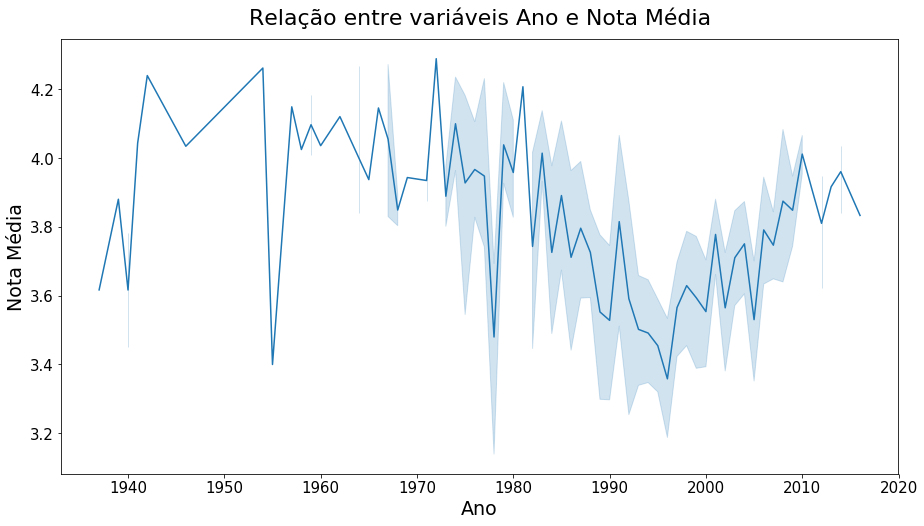

In [51]:
# solucao
#filmes.head()
ax = sns.lineplot(x='ano_de_lancamento', y='nota_media', data=filmes)
ax.figure.set_size_inches(15,8)
ax.set_title('Relação entre variáveis Ano e Nota Média', fontsize = 22, y=1.02)
ax.set_ylabel('Nota Média', fontsize = 19)
ax.set_xlabel('Ano', fontsize = 19)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [52]:
# solução (código)
filmes.corr().ano_de_lancamento['nota_media']

-0.1591455520444448

### Solução (explicação)
A correlação é de -15.91%. 
Correlação indica que a variação desses valores estão relacionados de alguma forma. porém, isso não quer dizer necessariamente que um implica no outro. 




## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

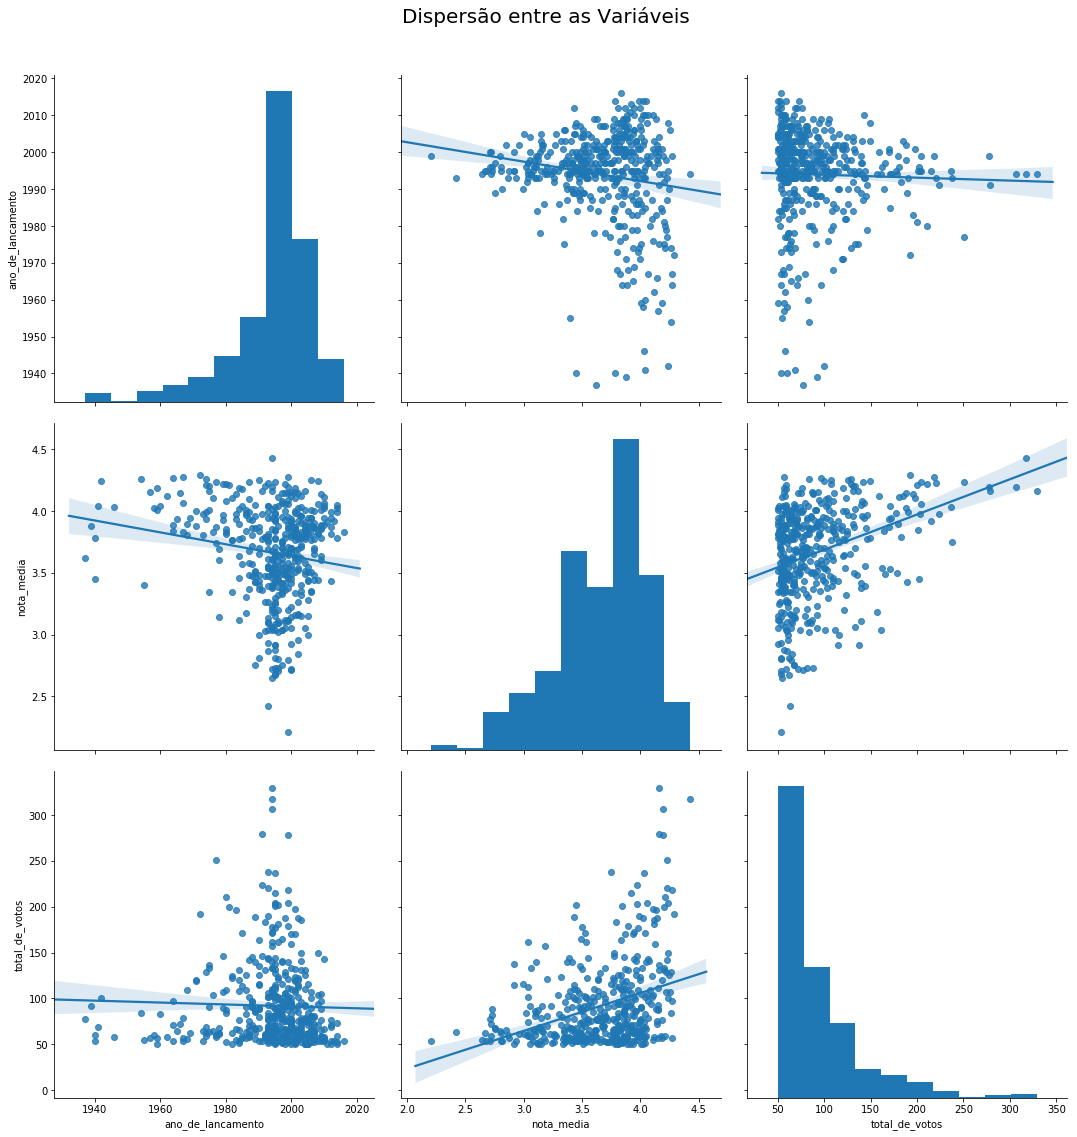

In [53]:
# solução
infos = filmes[['ano_de_lancamento','nota_media','total_de_votos']]
ax = sns.pairplot(infos, height=5, kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax


## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

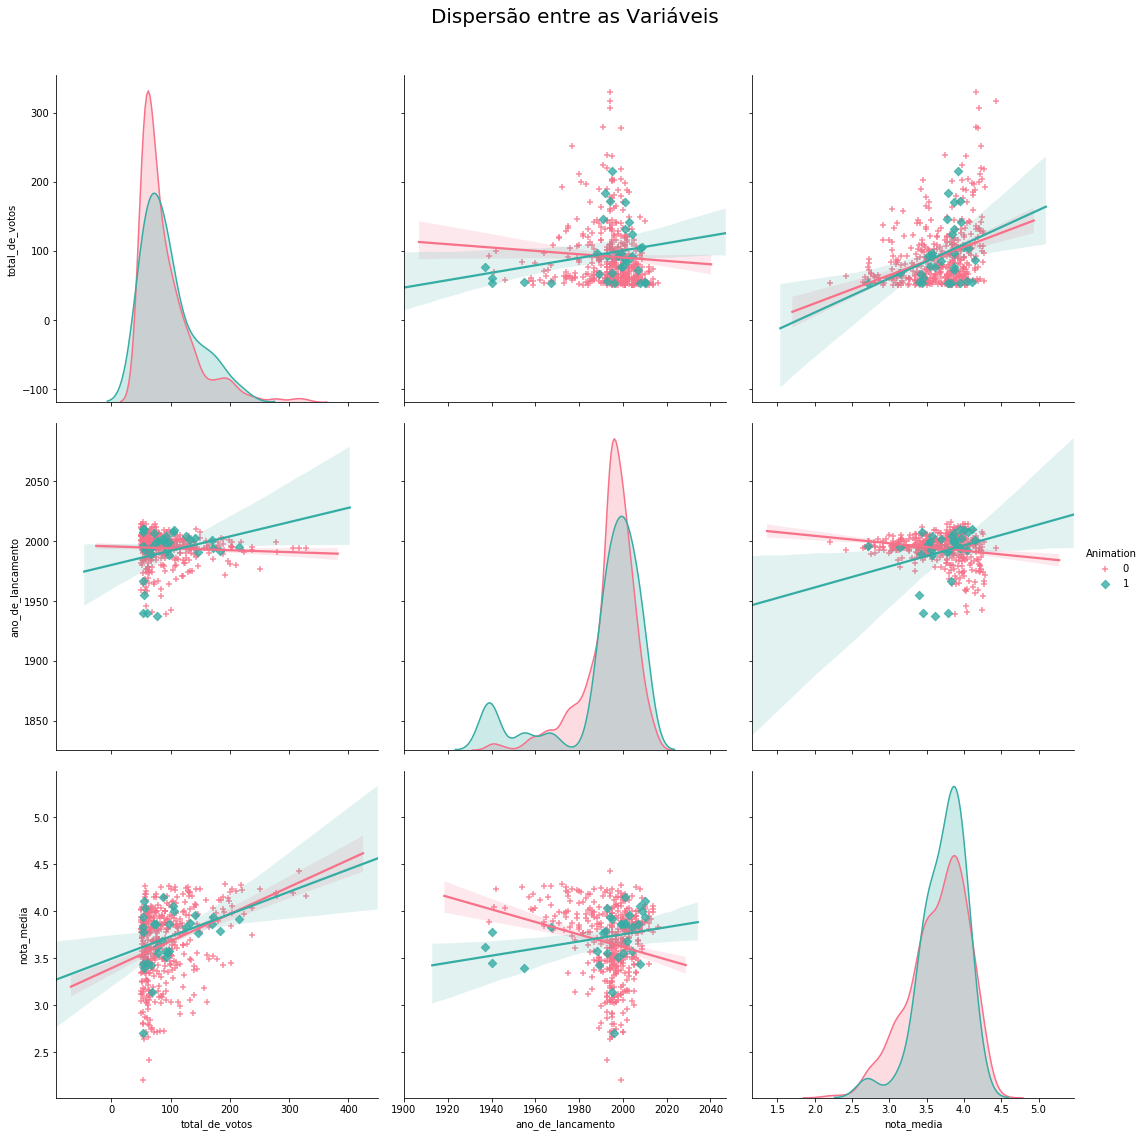

In [54]:
ax = sns.pairplot(filmes, y_vars = ['total_de_votos', 'ano_de_lancamento','nota_media'], x_vars = ['total_de_votos', 'ano_de_lancamento','nota_media'], hue='Animation', height=5, palette='husl', markers=['+','D'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax


## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

## Solução:
##### Q1: Parece existir uma pequena correlação positiva, conforme reta de regressão exibida no gráfico. porém, o ajuste linear não parece ser uma boa solução, pois a margem de variação ao redor dos anos 2000 é muito alta.

##### Q2: mesma resposta: Parece existir uma pequena correlação positiva, conforme reta de regressão exibida no gráfico. porém, o ajuste linear não parece ser uma boa solução, pois a margem de variação ao redor dos anos 2000 é muito alta.

##### Q3: A análise das outras categorias indica uma correlação negativa, diferentemente da categoria Aventura. 

##### Q4: A análise gráfica nos induz a levantar a hipótese de que quanto mais recentes os filmes de animação, mais populares e mais bem avaliados eles são. tendência contrária aos filmes de categorias que não são animação.


## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

In [55]:
# solução


isso explica em partes a variação muito alta de nota média e qtd votos ao redor dos anos 2000. foram muitos filmes lançados, o que acabou poluindo os dados e impediu uma regressão mais assertiva


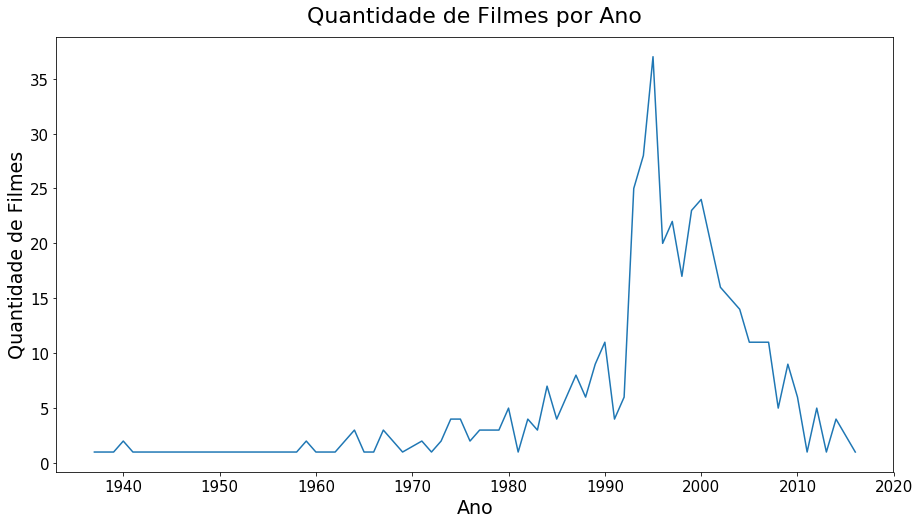

In [56]:
qtd_por_ano = pd.DataFrame(data={'ano':filmes.groupby(by='ano_de_lancamento').count().index.values , 'titulos': filmes.groupby(by='ano_de_lancamento').count().titulo.values})
qtd_por_ano = qtd_por_ano.sort_values('ano', ascending=True)

ax = sns.lineplot(x='ano', y='titulos', data=qtd_por_ano)
ax.figure.set_size_inches(15,8)
ax.set_title('Quantidade de Filmes por Ano', fontsize = 22, y=1.02)
ax.set_ylabel('Quantidade de Filmes', fontsize = 19)
ax.set_xlabel('Ano', fontsize = 19)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax

print('isso explica em partes a variação muito alta de nota média e qtd votos ao redor dos anos 2000. foram muitos filmes lançados, o que acabou poluindo os dados e impediu uma regressão mais assertiva')